In [2]:
from src import TARS, markets, portfolios, traders, strategies
%matplotlib inline

# Offline Testing

Welcome on the offline testing environment from Tars. It uses the same API than the online environment, but with virtual money. It's the best place to test your strategies before going online!


## Instanciate Tars

In [3]:
root = '../'
api_key = f'{root}kraken.key'

In [4]:
portfolio_1 = portfolios.VirtualPortfolio({'ZUSD': 1000})
trader_1 = traders.VirtualCryptoTrader(portfolio_1)
strategy_1 = strategies.BuyAndHold(trader_1, 'XETHZUSD', 0.2)

portfolio_2 = portfolios.VirtualPortfolio({'ZUSD': 1000})
trader_2 = traders.VirtualCryptoTrader(portfolio_2)
strategy_2 = strategies.TrendFollowingMACD(trader_2, 'XETHZUSD', 0.2)

portfolio_3 = portfolios.VirtualPortfolio({'ZUSD': 1000})
trader_3 = traders.VirtualCryptoTrader(portfolio_3)
strategy_3 = strategies.RandomInvestment(trader_3, 'XETHZUSD', 0.2)

In [5]:
# Create Tars and load its strategies
tars = TARS()
tars.load(strategy_1)
tars.load(strategy_2)
tars.load(strategy_3)

 🤖 TARS : Welcome to Endurance! 👨‍🚀
 🤖 TARS : Loaded strategy ➡️ Buy and hold
 🤖 TARS : Loaded strategy ➡️ Trend Following with MACD
 🤖 TARS : Loaded strategy ➡️ Random Investment


## Start the bot

In [6]:
tars.start('00:01:00')

 🤖 TARS : Starting trading session 📈
 ⏱ Trading decision will be taken every : 00:01:00️ (hh:mm:ss)
 💪️ Loading :   
   🧵 'Thread-4' ➡️ 'Buy and hold'
   🧵 'Thread-5' ➡️ 'Trend Following with MACD'
   🧵 'Thread-6' ➡️ 'Random Investment'
 The base XETH isn't available in the portfolio.


## Evaluate the strategy

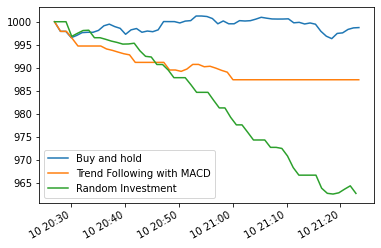

In [14]:
tars.plot()

In [16]:
tars.evaluate().tail()

,Buy and hold,Trend Following with MACD,Random Investment
2021-08-10 21:19:00+00:00,997.46,987.41,962.88
2021-08-10 21:20:00+00:00,997.58,987.41,963.67
2021-08-10 21:21:00+00:00,998.34,987.41,964.39
2021-08-10 21:22:00+00:00,998.67,987.41,962.75
2021-08-10 21:23:00+00:00,998.73,987.41,962.75


## Stop the bot

In [11]:
tars.stop()

 🤖 TARS : ✋ Stopped all strategies


---